# Lesson 7 Overview

1. Charts
2. Bar chart
3. Histogram
4. Pie chart
5. Time series

## Let's load today's lesson!

### Open Azure Notebooks library 

Go to https://notebooks.azure.com -> Sign in if needed -> Select **python-codeacademy-sg**

### Update lesson file to latest version

Select **New** -> **From URL** -> input https://raw.githubusercontent.com/viettrung9012/python-codeacademy-sg/master/Lesson7.ipynb (URL is available in **Lesson7.ipynb**) -> Click outside input then select **Upload** (overwrite if needed)

### Open Jupyter lab

From your browser's bookmark or **Run** -> Change browser URL path from **/nb/tree** to **/nb/lab**

Select **Lesson7.ipynb**

## Charts
A chart is a visual representation of the data and it allows its readers to understand the information quicker than reading the raw data.

Compare the data and the chart below, which one do you find easier to get <b>meaningful insights</b>?

### Raw data 
- Source: [United Nations' Total Population data](https://esa.un.org/unpd/wpp/Download/Standard/Population/)
- Total Population of both Sexes. De facto population in a country, area or region as of 1 July of the year indicated. Figures are presented in thousands.
- Can you infer any insights from the data?
![World Population](UNTotalPopulation.png)

### Chart
- Soure: [Hans Rosling's Income-Life Expectancy relationship graph](https://www.gapminder.org/answers/how-does-income-relate-to-life-expectancy/)
- Color shows the region: Africa (blue), Americas (green), Asia (red), Europe (yellow)
- Bubble size indicates the size of population
- So, what can we infer from the chart below? How does Africa compared to Asia?
![Income-Life Expectancy](HansRosling.png)

### Preparing Data
We need to do the following steps to prepare the data before we transform them into the charts.
1. Use csv library.
2. Open the csv file.
3. Read the csv file to determine how to transform the data to suit with the chart type. 

In [75]:
#Step 1
import csv

#Step 2
file = open("Biggest Loser 2018.csv")

#Step 3
reader = csv.reader(file)
for row in reader:
    print(row)

['\ufeffteam_no', 'team_name', 'team_captain', 'team_member', '2018-04-02', '2018-04-03', '2018-04-04', '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08', '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12', '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16', '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20', '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24', '2018-04-25', '2018-04-26', '2018-04-27', '2018-04-28', '2018-04-29']
['1', 'TBD', 'FALSE', '1-1', '11980', '10437', '17616', '24586', '16136', '13700', '39812', '9195', '12855', '11309', '23606', '11848', '6120', '6254', '8754', '6469', '8849', '9911', '7709', '534', '13465', '7341', '11230', '7878', '11029', '8790', '9006', '21942']
['1', 'TBD', 'FALSE', '1-2', '22935', '13399', '25098', '29581', '26121', '12805', '16073', '15124', '16011', '6198', '10026', '10909', '14468', '4828', '11207', '7133', '14977', '13746', '12267', '9364', '1061', '6075', '11188', '11472', '10150', '13023', '6769', '10165']
['1',

### Bar Chart
Definition: It represents the categories as the rectangular bars with height (for vertical bar chart) or length (for horizontal bar chart) proportional to the values.

<b>Case 1: The most active day of week</b>
<p>Requirement: Day of Week and Total Steps to create the bar chart. 
Day of week as the category and for each day of week, we sum the total steps.</p>

Steps to create bar chart:
1. Create a new dataframe from the file. Use pandas library and [read_csv function()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) to easily manipulate the data.
2. Transpose the Date column into row. Use [melt function() on pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html).
3. Add a new column to identify the day of week from the dates (e.g.: Sunday, Monday, etc.). Use [to_datetime() function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html) to ensure that the "Date" column is in the datetime format. Use [dt.weekday_name property](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.dt.dayofweek.html) to get the weekday name.
4. Sum the steps in each day of week. Use [groupby() function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) and [sum() function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html) to summarize the total steps by day of week.
5. Sort the total steps in descending order. Use [sort_values() function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html).
6. Plot the dataframe as bar chart using [plot.bar() function](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.bar.html). 

In [199]:
#Step 1
import pandas as pd
bl2018 = pd.read_csv("Biggest Loser 2018.csv")

#Step 2
date_col = list(bl2018.columns.values)[4:] #Get the column name for date only (starting from 4th column)
bardf = pd.melt(bl2018, value_vars=date_col, var_name="Date", value_name="Total Steps")

#Step 3
bardf["Date"] = pd.to_datetime(bardf["Date"])
bardf["Day of Week"] = bardf["Date"].dt.weekday_name

#Step 4
bardf = bardf.groupby("Day of Week").sum()

#Step 5
bardf = bardf.sort_values(by=["Total Steps"], ascending=[False])

bardf

,Total Steps
Day of Week,
Saturday,2722945.0
Tuesday,2656376.0
Monday,2643579.0
Thursday,2610982.0
Wednesday,2581746.0
Friday,2547392.0
Sunday,2485167.0


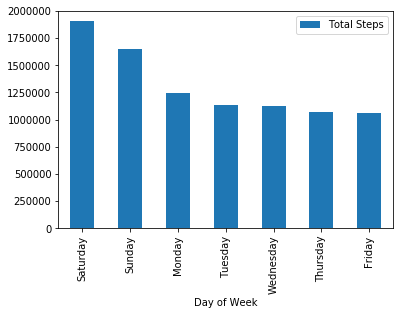

In [174]:
#Step 6
barchartdf.plot.bar()

Homework:
1. Create vertical bar chart with the team_name category for Saturday only.
2. Create horizontal bar chart using [barh() function](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.plot.barh.html).

### Histogram
Definition: It is similar to bar chart but it groups numbers into ranges to show distributions of variables.
<p>Use cases: Salary, test scores, weight</p>

<b>Case 2: The daily steps distribution</b>

Requirement: Daily steps of each participants throughout the Big Loser period. 

Steps to create histogram:
1. Create a new dataframe from the file. Use pandas library and [read_csv function()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) to easily manipulate the data.
2. Transpose the Date column into row. Use [melt function() on pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html).
3. Determine the number of bins. If you want to refine the number of bins, please refer to [Wikipedia's Histogram document](https://en.wikipedia.org/wiki/Histogram#Number_of_bins_and_width) as this is beyond our discussion here.
4. Plot histogram of the dataframe. Use [plot.hist() function](http://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.DataFrame.hist.html).

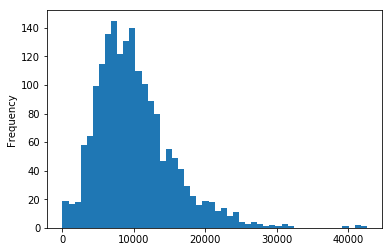

In [200]:
#Step 2
histdf = pd.melt(bl2018, value_vars=date_col, value_name="Total Steps")

#Step 4
histdf["Total Steps"].plot.hist(bins=50)

Homework:
1. Change the number of bins and observe the differences.
2. Create one histogram of any team and compare it with the histogram of the overall groups above. 

### Pie Chart
Definition: A circle with slices represent the numerical proportion to the whole. Also known share of voices.

<b>Case 3: Teams' steps contribution</b>

Requirement: Total steps of each team.

Steps to create pie chart:
1. Create a new dataframe from the file. Use pandas library and [read_csv function()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) to easily manipulate the data.
2. Transpose the Date column into row. Use [melt function() on pandas](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.melt.html).
3. Sum the steps in each day of week. Use [groupby() function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) and [sum() function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html) to summarize the total steps by day of week.
4. Sort the total steps in descending order. Use [sort_values() function](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html).
5. Plot the dataframe as pie chart using [plot.pie() function](https://pandas.pydata.org/pandas-docs/version/0.18/generated/pandas.DataFrame.plot.pie.html).

In [202]:
#Step 2
piedf = pd.melt(bl2018, id_vars=["team_name"], value_vars=date_col)
piedf.columns = ["Team Name", "Date", "Total Steps"]

#Step 3
piedf = piedf.groupby("Team Name").sum()

#Step 4
piedf = piedf.sort_values(by=["Total Steps"], ascending=[False])

piedf

,Total Steps
Team Name,
TBD,1820997.0
Stop when you drop!!,1721534.0
The Slimsons,1484755.0
Scrambled Legs,1480327.0
Tears for Beers,1468397.0
"11,111 to No. 1",1395549.0
Cereal Killers,1333977.0
FuFu,1198137.0
Will Walk for Wine,1158732.0


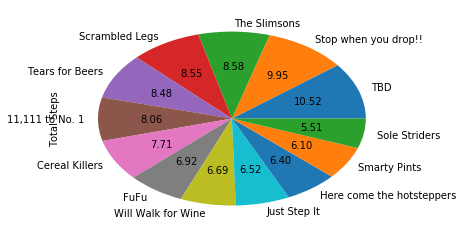

In [203]:
#Step 5
piedf.plot.pie(y="Total Steps", legend=False, autopct='%.2f')